# IBM HR Analytics 
## Employee Attrition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

## Data Product Life Cycle
<hr>
<img src="DSLifeCycle.PNG">


## Exploratory Data Analysis (EDA)
In this phase, by data visualisation, we explore data in order to:
<ul>
  <li>Look at Data Distribution</li>
  <li>Discoer Data Correlation</li>
  <li>Discoer Insights</li>
  <li>Identify Missing Values</li>
  <li>Detect Outliers</li>
</ul>

### Data Mapping
**Education** 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor' <br>

**EnvironmentSatisfaction** 1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>

**JobInvolvement** 1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>

**JobSatisfaction** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'  <br>

**PerformanceRating**  1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'  <br>

**RelationshipSatisfaction**  1 'Low' 2 'Medium' 3 'High' 4 'Very High'  <br>

**WorkLifeBalance** 1 'Bad' 2 'Good' 3 'Better' 4 'Best'  <br>

**Attrition** 
 - Yes: Left
 - No: Did not leave

### Loading Data

In [4]:
data_df = pd.read_excel('IBM-Dataset-HR-Employee-Attrition.xlsx')
data_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Pre-Processing

In [5]:
def get_value_slice(n, bins, labels):
    for i,x in enumerate(bins):
        try:
            # if int(n) in range(bins[i],bins[i+1]):
            # if n in range(bins[i],bins[i+1]):
            if n >= bins[i] and n < bins[i+1]:
                return labels[i]
        except Exception as e:
            # print(str(e), '-----', n, labels)
            return labels[-1]
        
def set_category(df, init_col, target_col, bins, labels):
    df[target_col] = df.apply(lambda x: get_value_slice(x[init_col], bins, labels), axis=1)

In [6]:
data_df['Age_Group'] = ''
set_category(data_df,'Age', 'Age_Group', [0, 25, 35, 45, 55, 150],['17-25','25-35','35-45','45-55','55>'])

### Target Data

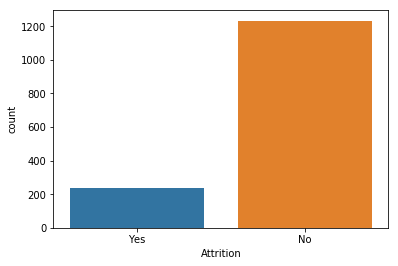

In [7]:
sns.countplot(data=data_df, x="Attrition")

From the graph above, it can be seen that we have an imbalanced dataset. That is, the majority of observations are of the value: 'NO'. There are  84% of observations of the whole dataset having 'No', while 16% of the observations with the 'Yes' value.

### Missing Data check

In [8]:
df_missing_type = []
for column in data_df.columns:
    d= {'Column': column,
        'Data Type': str(data_df[column].dtypes),
        'Number of Missing Valuess': data_df[column].isnull().sum()
        }
    df_missing_type.append(d)
pd.DataFrame(df_missing_type)

,Column,Data Type,Number of Missing Valuess
0,Age,int64,0
1,Attrition,object,0
2,BusinessTravel,object,0
3,DailyRate,int64,0
4,Department,object,0
5,DistanceFromHome,int64,0
6,Education,int64,0
7,EducationField,object,0
8,EmployeeCount,int64,0
9,EmployeeNumber,int64,0


### Data Correlation

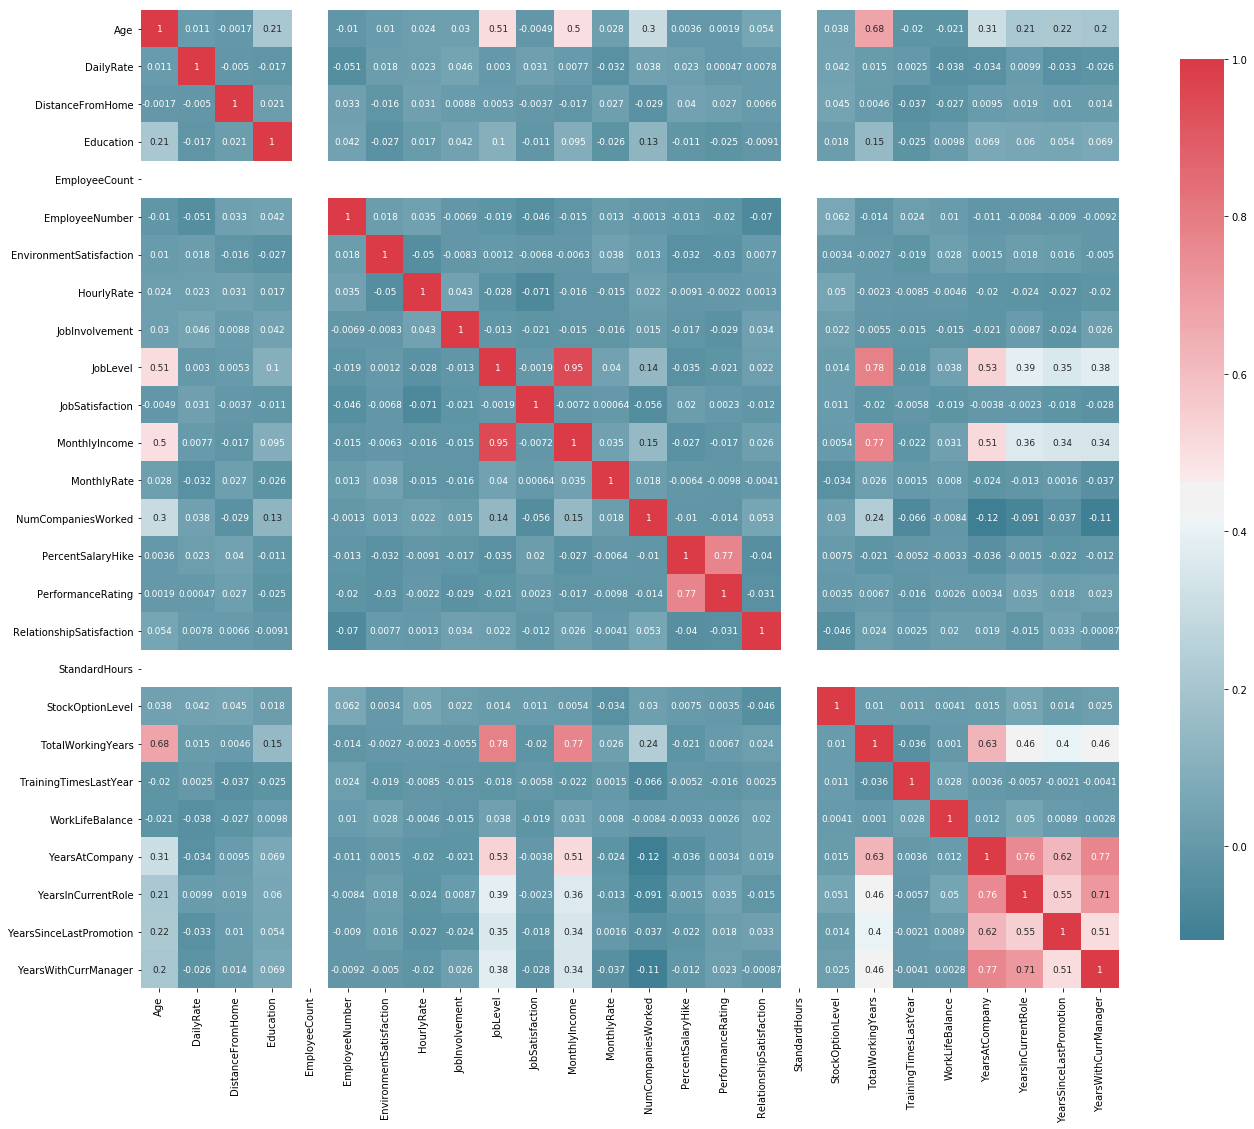

In [9]:
corr = data_df.corr()
_ , ax = plt.subplots( figsize =( 22 , 18 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 9 })

In [10]:
# columns_num = data_df.select_dtypes(include=[np.number]).columns.tolist()

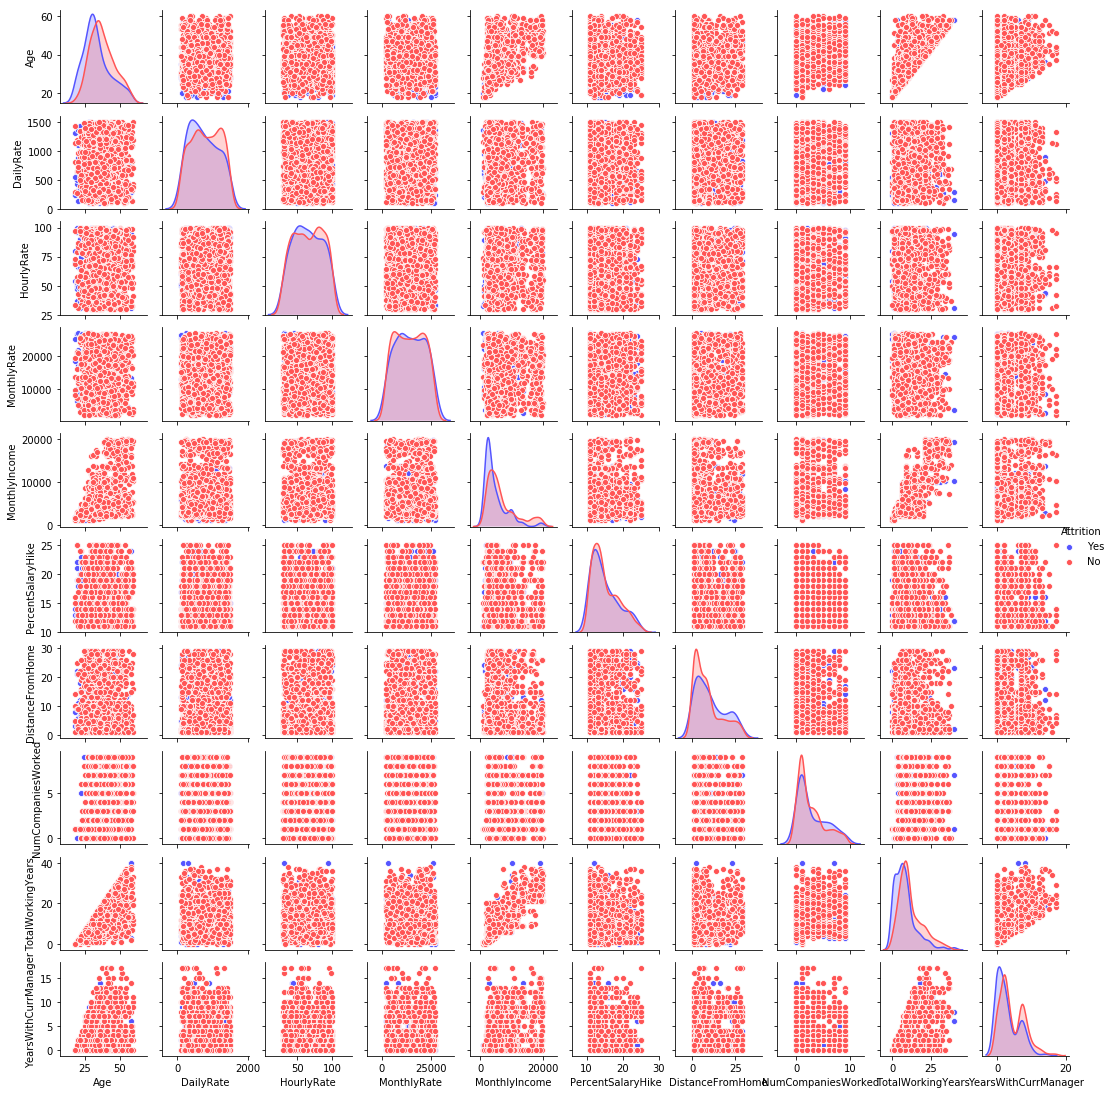

In [11]:
columns_num = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'MonthlyIncome', 'PercentSalaryHike',
               'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsWithCurrManager']
g = sns.pairplot(data_df[columns_num + ['Attrition']], hue='Attrition', palette='seismic', diag_kind = 'kde',
                 diag_kws=dict(shade=True))

g.fig.set_size_inches(15,15)

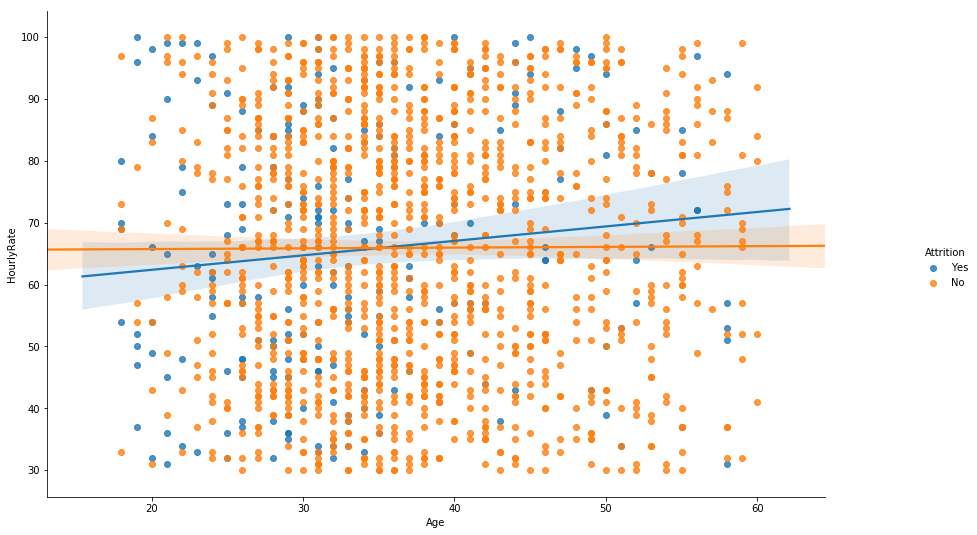

In [12]:
g = sns.lmplot(x='Age', y='HourlyRate', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

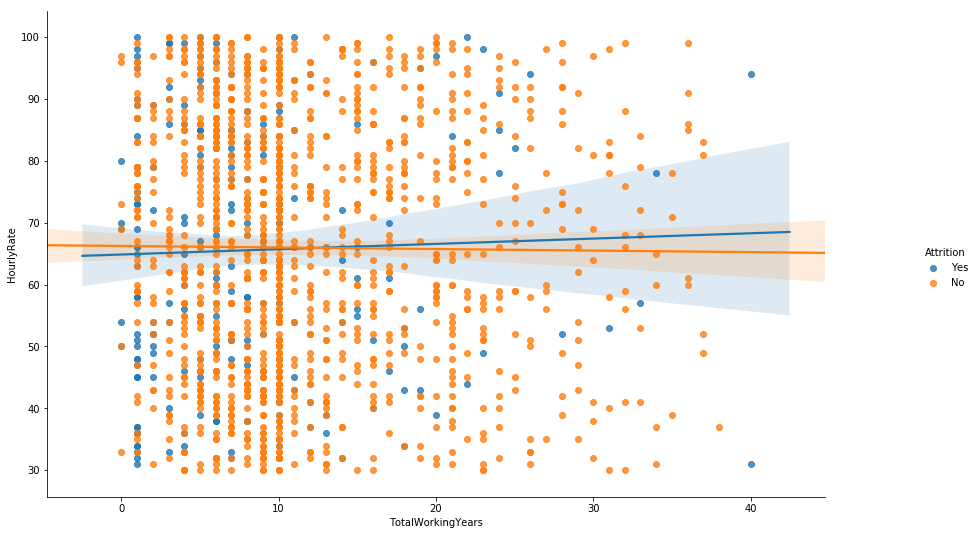

In [13]:
g = sns.lmplot(x='TotalWorkingYears', y='HourlyRate', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

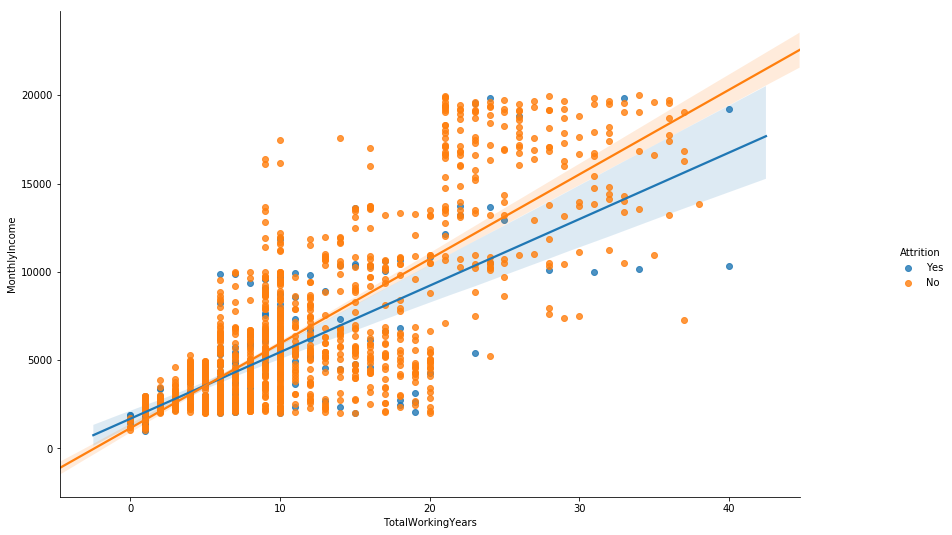

In [14]:
g = sns.lmplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

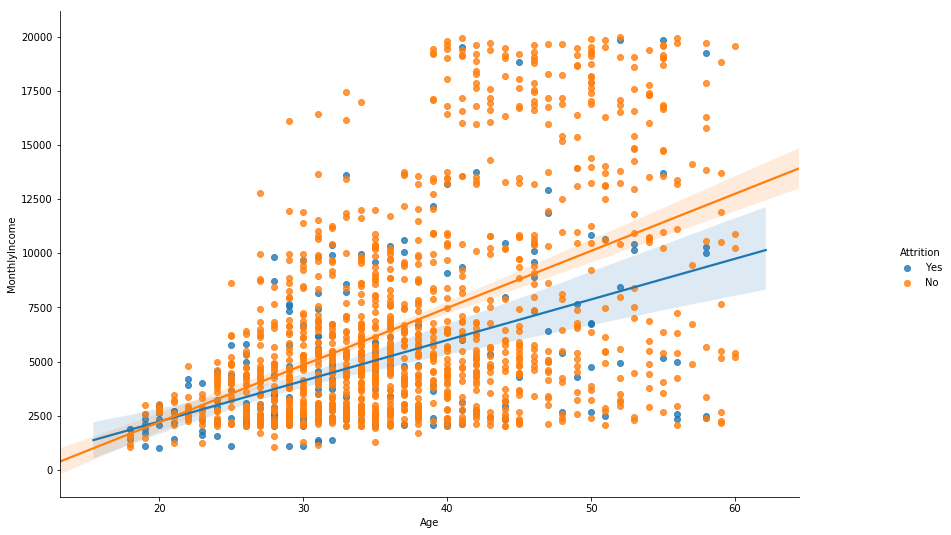

In [15]:
g = sns.lmplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

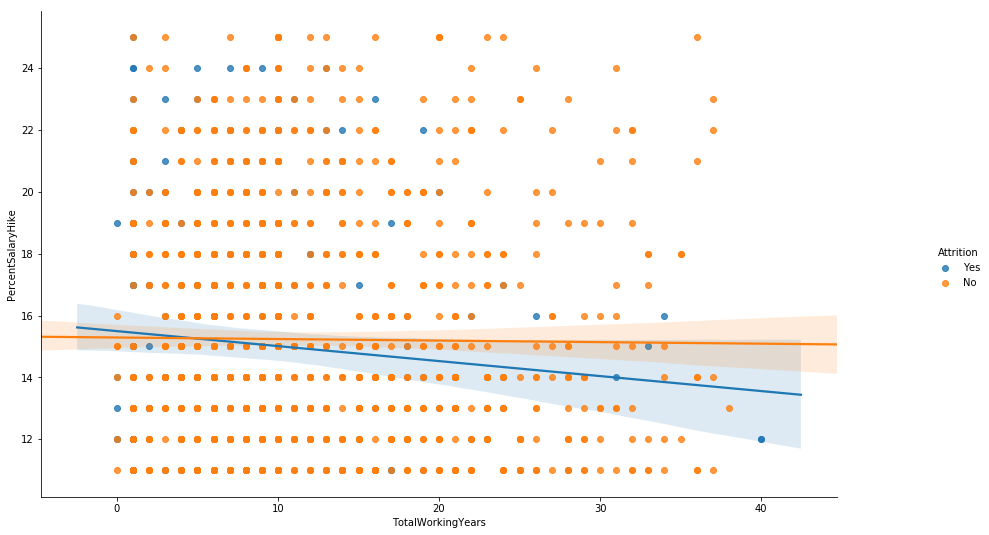

In [16]:
g = sns.lmplot(x='TotalWorkingYears', y='PercentSalaryHike', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

### Data Distribution

In [17]:
variables = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'PercentSalaryHike', 
             'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
             'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating', 
             'MonthlyIncome']

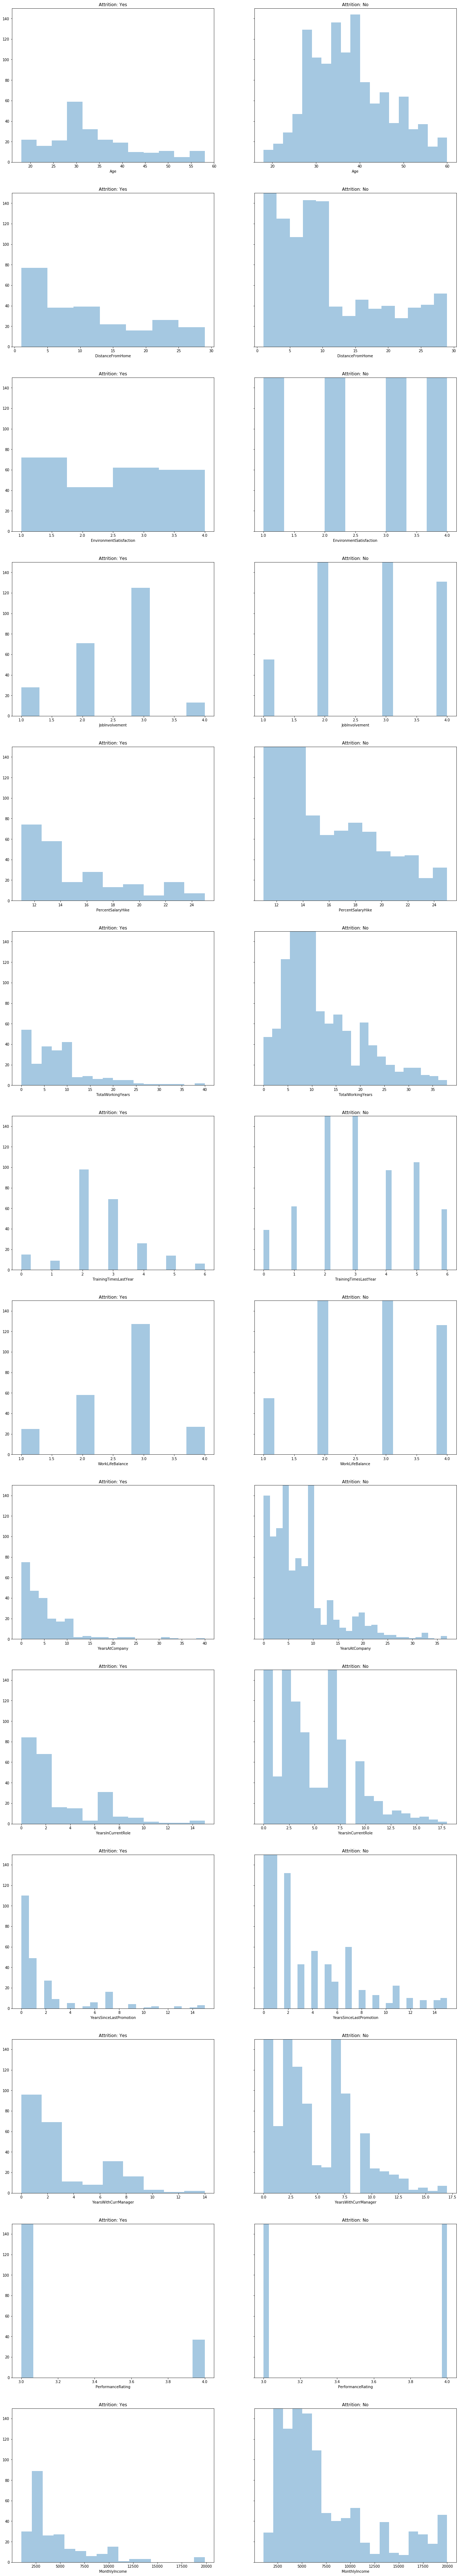

In [18]:
plots_per_row = 2
n = len(variables)
fig,ax = plt.subplots(n,2, figsize=(22,20), sharey=True)
for i, item in enumerate(variables):
    for j, label in enumerate(['Yes', 'No']):
        ax[i, j].set_ylim(0,150)
        ax[i, j].set_title("Attrition: " + label)
        sns.distplot(data_df[item][data_df.Attrition == label], ax = ax[i,j], kde=False)

plt.subplots_adjust(bottom=-1.9, top=3)

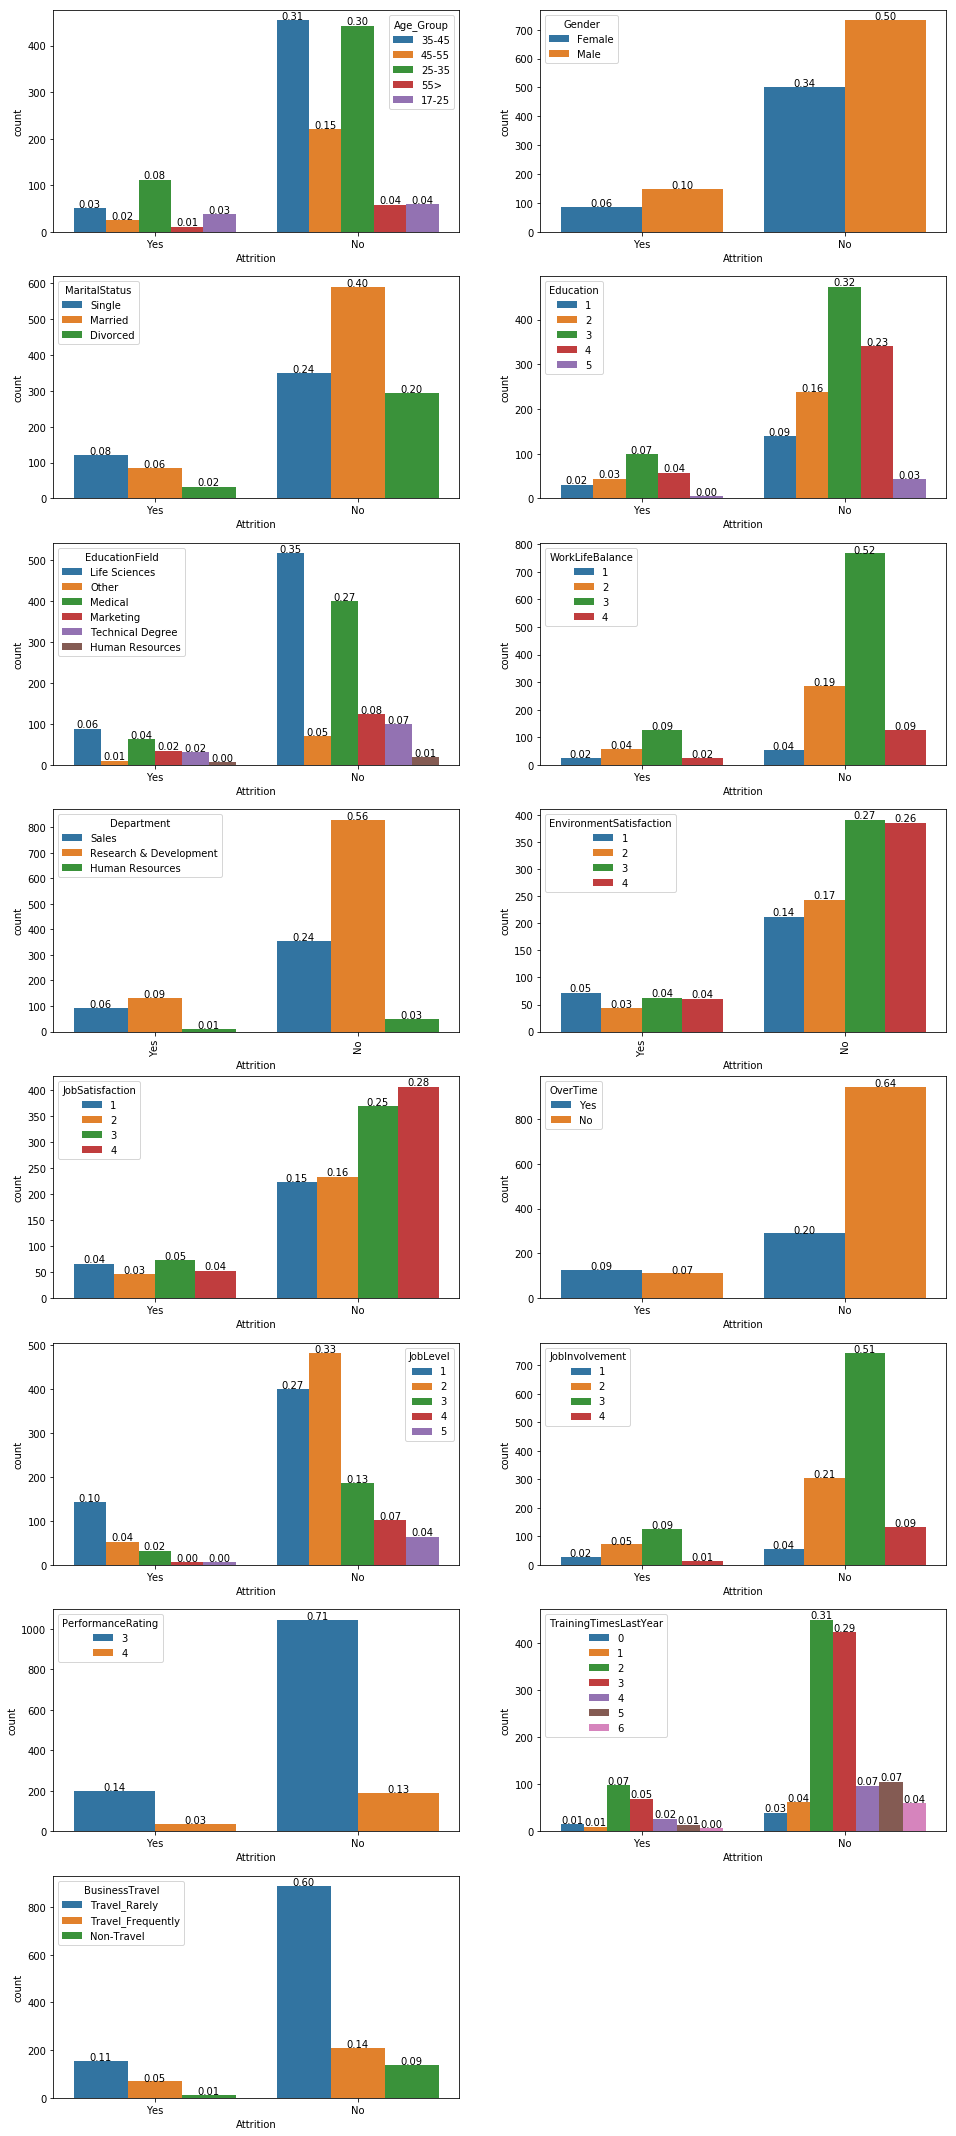

In [19]:
total_records= len(data_df)
columns_cat = ["Age_Group", "Gender", "MaritalStatus", "Education", "EducationField", "WorkLifeBalance", 
               "Department", "EnvironmentSatisfaction", "JobSatisfaction", 
               "OverTime", "JobLevel", "JobInvolvement",  "PerformanceRating", 
               "TrainingTimesLastYear", "BusinessTravel"
               ]
plt.figure(figsize=(16,10))
n = math.ceil(len(columns_cat)/2)
j=0
for column in columns_cat:
    j +=1
    plt.subplot(n,2,j)
    ax1 = sns.countplot(data=data_df,x= "Attrition",hue=column)
    if(j == n or j == (n-1)):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

plt.subplots_adjust(bottom=-0.9, top=2)

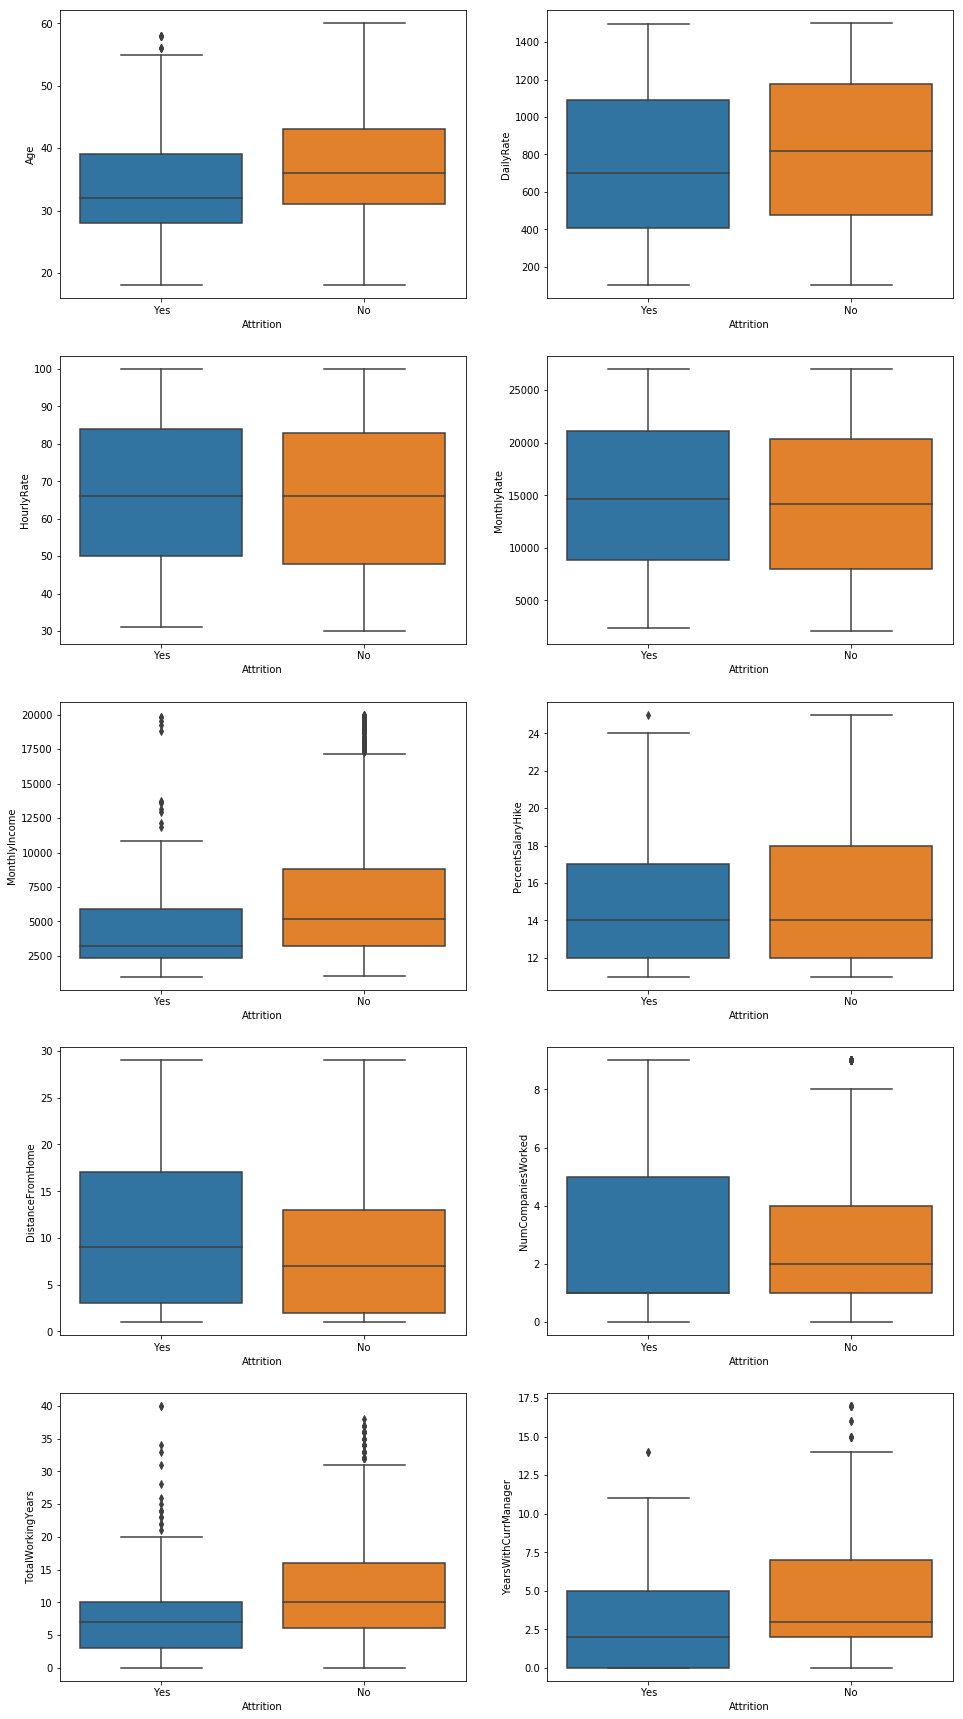

In [20]:
plt.figure(figsize=(16,8))
n = math.ceil(len(columns_num)/2)
j=0
for column in columns_num:
    j +=1
    plt.subplot(n,2,j)
    g = sns.boxplot(x='Attrition', y=column, data=data_df)

plt.subplots_adjust(bottom=-0.9, top=2)

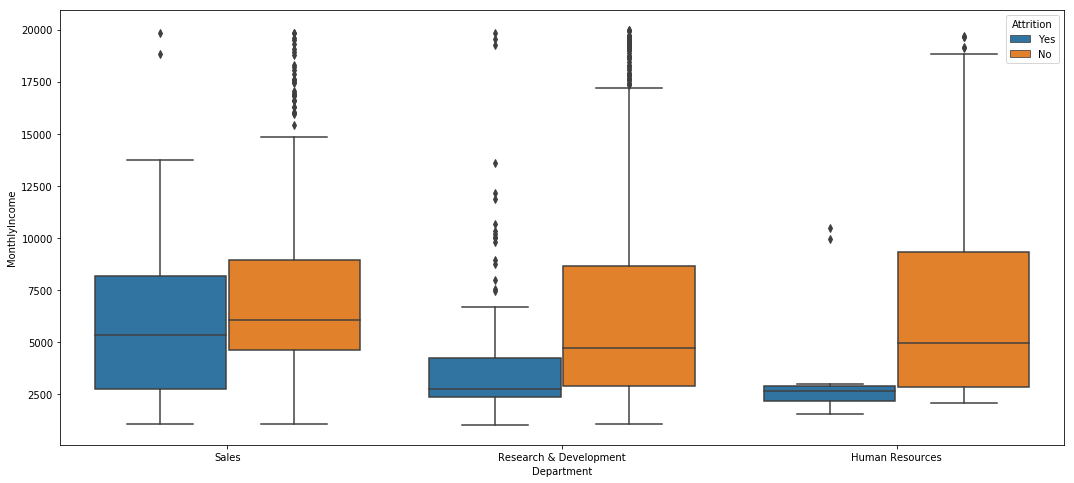

In [21]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Department', y='MonthlyIncome', hue="Attrition", data=data_df)

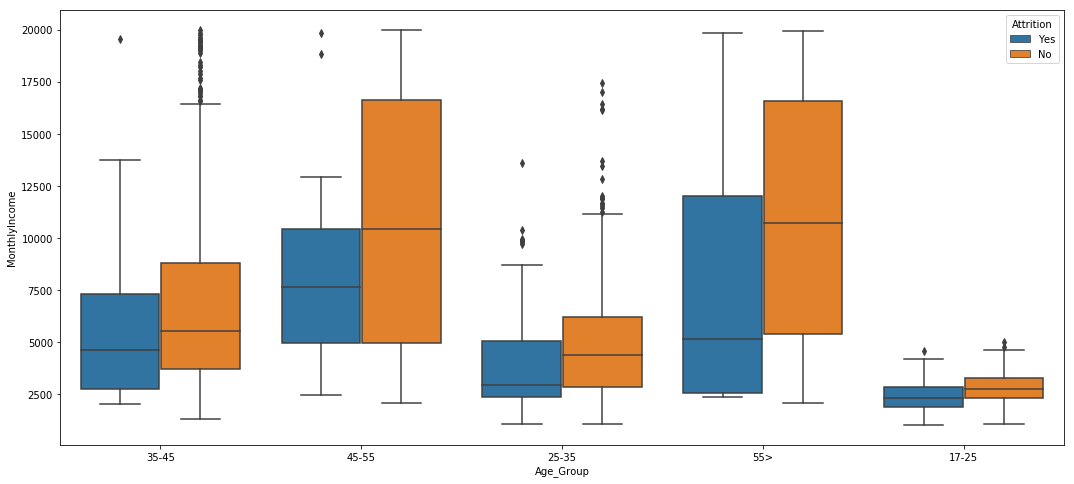

In [22]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Age_Group', y='MonthlyIncome', hue="Attrition", data=data_df)

### Observations
1.	Attrition among males was slightly higher than females
2.	Employees who are “Single”; acknowledged by 8%, were more likely to leave than those who are married and divorced
3.	Employees in the R&D and Sales departments are much more likely to quit compared to the HR department
4.	There is a quite large difference in salaries between who left and stayed employees in the R&D and HR departments
5.	Employees who left had less monthly income compared to those who did not leave employees
6.	Employees who worked over-time had more Attrition
7.	Employees that were involved highly in their job were more likely to leave
8.	Employees who travelled rarely were more likely to leave.
9.	Employees who used to have longer commute distances were most likely to leave


## Modeling

In [23]:
df = data_df[columns_cat + columns_num + ['Attrition']]

for col in columns_cat:
    df_ = pd.get_dummies(df[col], prefix=col)
    df = df.drop(col, axis=1)
    df = pd.concat([df, df_], axis=1)
    
df['Attrition']=np.where(df['Attrition']=='No', 0, 1)

In [24]:
X=df.drop(['Attrition'], axis=1)
y=df.Attrition

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [25]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=20,max_features='auto', max_depth=4)
clf = estimator.fit(X_train, y_train)

from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve, \
                            confusion_matrix,precision_score,confusion_matrix

predictions=clf.predict(X_test)
print("Accuracy ",accuracy_score(predictions,y_test))
print("ROC_AUC  ",roc_auc_score(predictions,y_test))
print("Classification Report \n",classification_report(predictions,y_test))

Accuracy  0.8469387755102041
ROC_AUC   0.7586805555555555
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.85      0.92       288
           1       0.09      0.67      0.15         6

   micro avg       0.85      0.85      0.85       294
   macro avg       0.54      0.76      0.53       294
weighted avg       0.97      0.85      0.90       294



In [26]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[245   2]
 [ 43   4]]


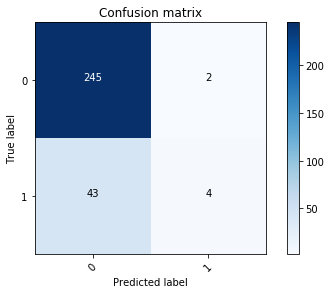

In [27]:
class_names = ['0', '1']
confusion_matrix=confusion_matrix(y_test,predictions)
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix')

In [28]:
def show_most_importance(clf, n):
    '''
    This is to show the most important features
    clf: is the trained model
    n: the highest n readings
    '''
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:n] # This to show the top ten
    feat_names = X_train.columns.values
    plt.figure(figsize=(16,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()

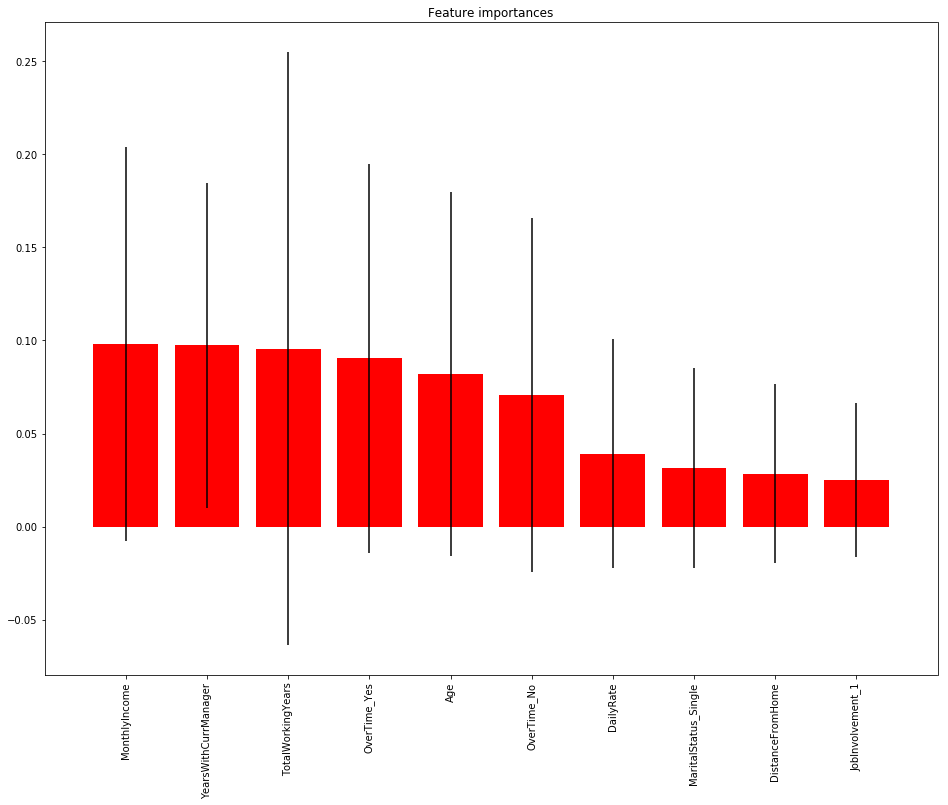

In [29]:
show_most_importance(clf, 10)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.001, 1.0, 10)):
    """
    This function is to generate a simple plot of the test and traning learning curve.
    """
    plt.figure(figsize = (16,15))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.yticks(np.arange(0.0, 1.1, 0.010))
    plt.tick_params(labelright=True)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

CPU times: user 314 ms, sys: 71.4 ms, total: 386 ms
Wall time: 3.31 s


<module 'matplotlib.pyplot' from '/Users/rami/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

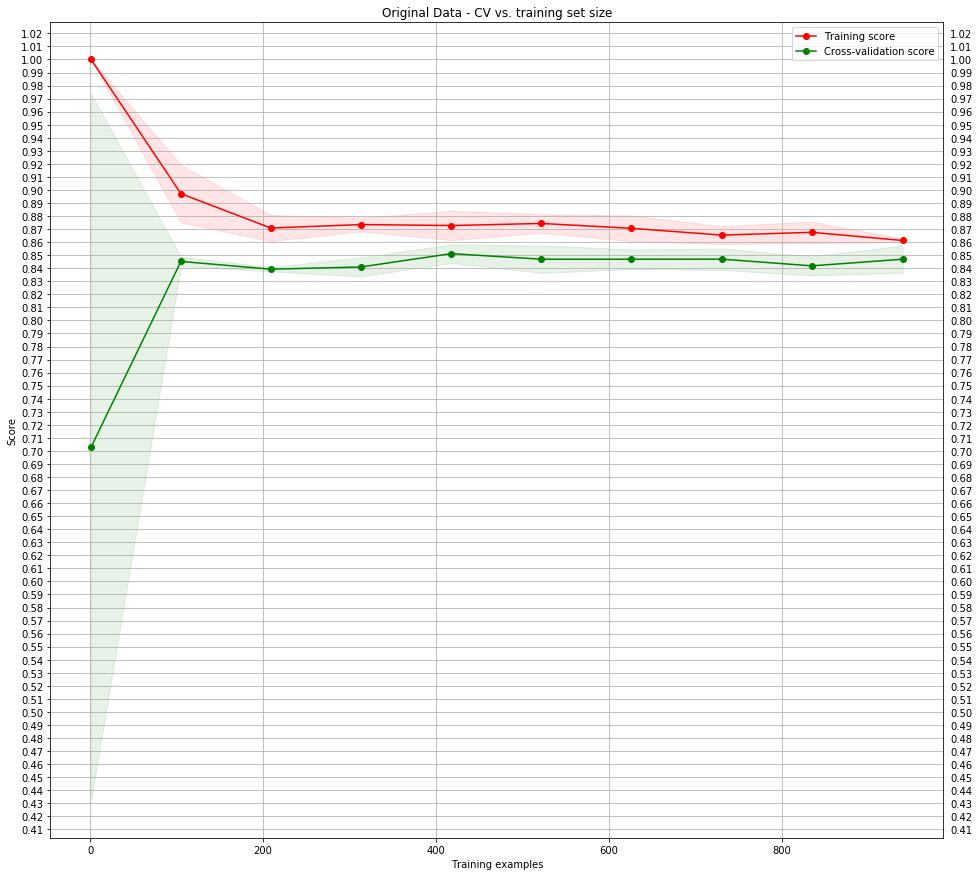

In [31]:
%time plot_learning_curve(clf, "Original Data - CV vs. training set size", X_train, y_train, cv=5)

#### Model Improvement

In [32]:
from imblearn.over_sampling import RandomOverSampler


X = df.loc[:, df.columns != "Attrition"].values
y = df.loc[:, df.columns == "Attrition"].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

ros = RandomOverSampler(random_state=101)
X_train_u, y_train_u = ros.fit_sample(X_train, y_train)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)

X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (1176, 69) (1176,)
Upsampled shape: (2958, 69) (2958,)
Downsampled shape: (380, 69) (380,)


Original
The best hyperparameters for Original data:
criterion :  entropy
max_features :  0.75
n_estimators :  100
Accuracy  0.8571428571428571
Recall  0.6923076923076923
ROC_AUC   0.7785381877908568
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       281
           1       0.19      0.69      0.30        13

   micro avg       0.86      0.86      0.86       294
   macro avg       0.59      0.78      0.61       294
weighted avg       0.95      0.86      0.89       294

Best f1-score: 85.29%.
Upsampled
The best hyperparameters for Upsampled data:
criterion :  entropy
max_features :  0.4
n_estimators :  50
Accuracy  0.8435374149659864
Recall  0.5555555555555556
ROC_AUC   0.7040935672514619
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       285
           1       0.11      0.56      0.18         9

   micro avg       0.84      0.84     

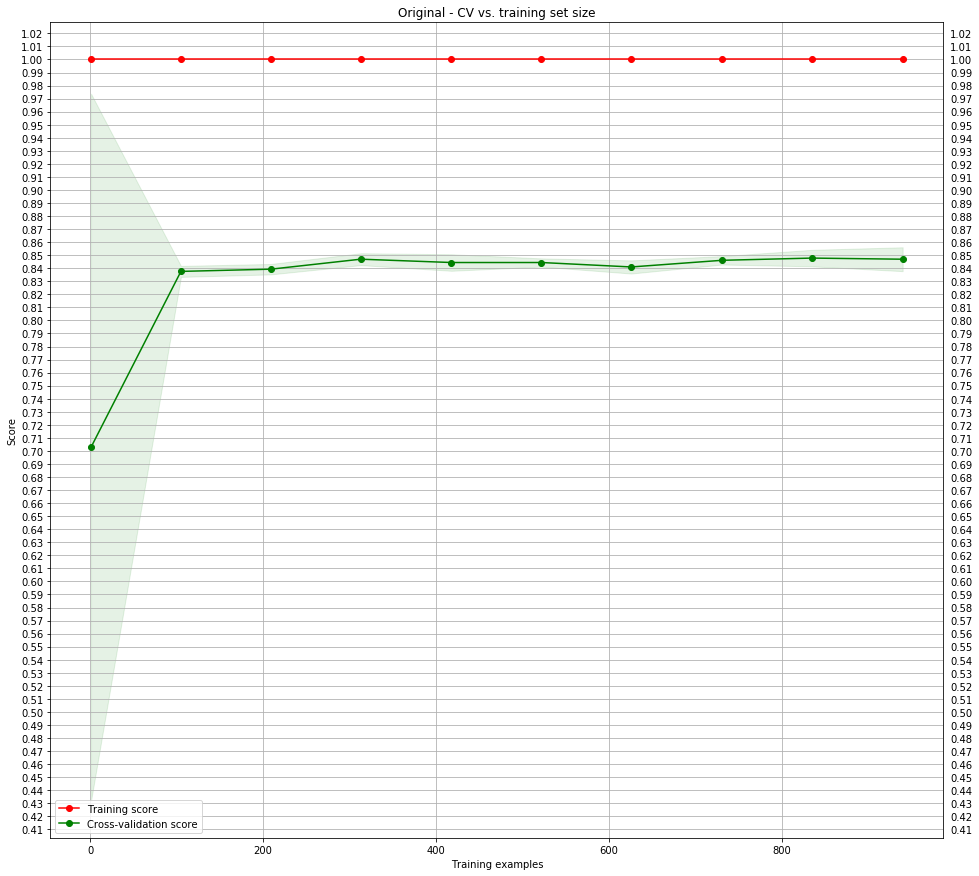

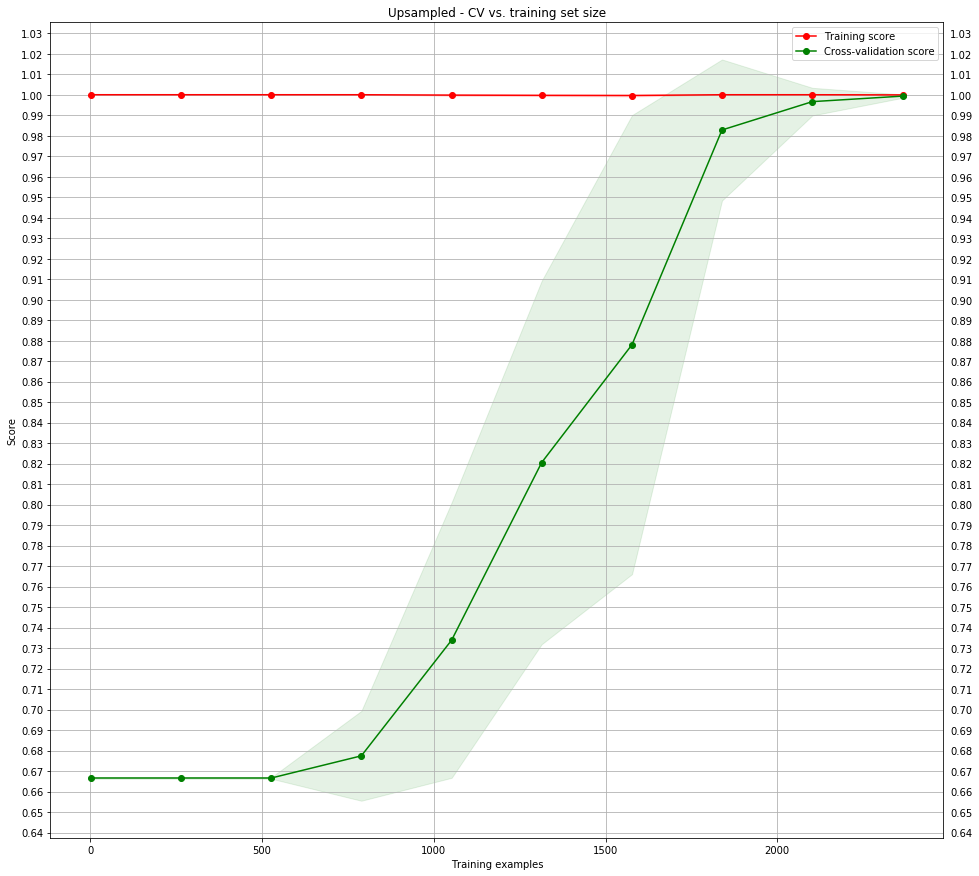

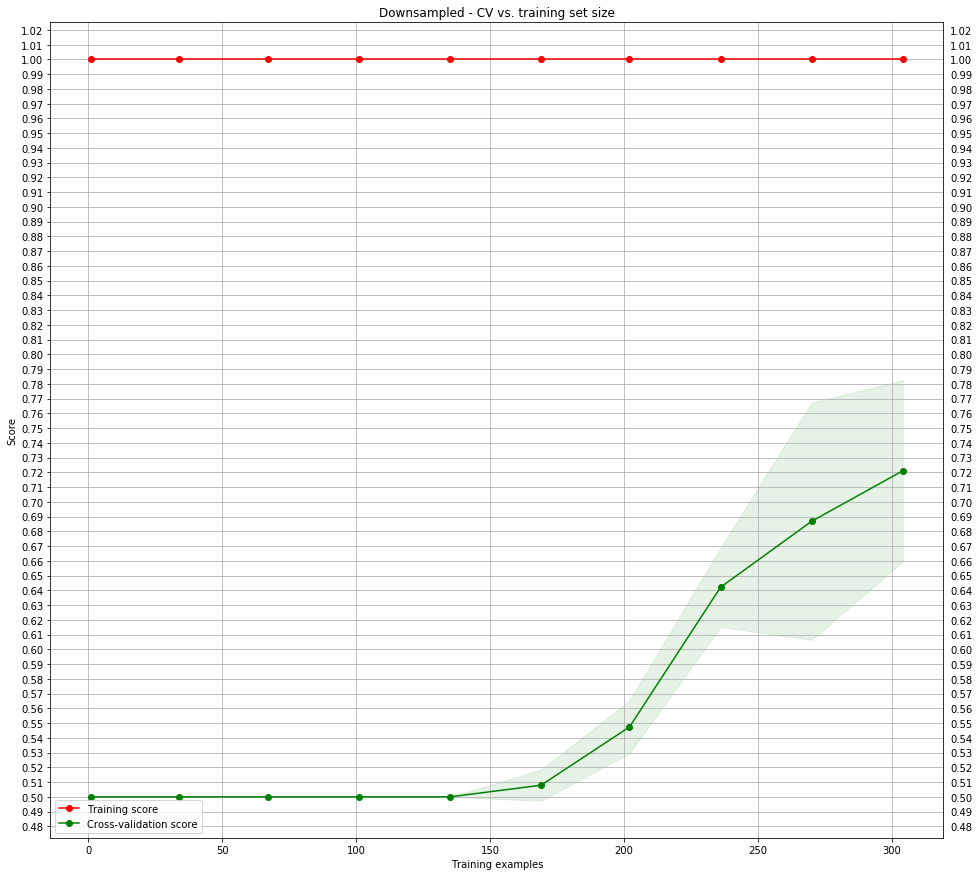

In [35]:
import warnings
warnings.filterwarnings('ignore')

methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d)
               }

for method in methods_data.keys():
    print(method)
    pip_rf = make_pipeline(StandardScaler(),
                           PCA(iterated_power=9, svd_solver="randomized"),
                           RandomForestClassifier(class_weight="balanced",
                                                  max_leaf_nodes=1024,
                                                  random_state=101))
    
    hyperparam_grid = {
        "randomforestclassifier__n_estimators":  [20, 50, 80, 100], # [10, 50, 100, 500],
        "randomforestclassifier__max_features": ["sqrt", "log2", 0.4, 0.5,0.75,0.90, 1.0],
        "randomforestclassifier__min_samples_leaf": [1, 2, 3, 5],
        "randomforestclassifier__criterion": ["gini", "entropy"]}
    
    gs_rf = GridSearchCV(pip_rf,
                         hyperparam_grid,
                         scoring= "accuracy", # "f1",
                         cv=5,
                         n_jobs=-1)
    X_t, y_t = methods_data[method][0], methods_data[method][1]
    gs_rf.fit(X_t, y_t)
    
    print("\033[1m" + "\033[0m" + "The best hyperparameters for {} data:".format(method))
    for hyperparam in gs_rf.best_params_.keys():
        print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_rf.best_params_[hyperparam])

    predictions=gs_rf.predict(X_test)
    print("Accuracy ",accuracy_score(predictions,y_test))
    print("Recall ",recall_score(predictions,y_test))
    print("ROC_AUC  ",roc_auc_score(predictions,y_test))
    print("Classification Report \n",classification_report(predictions,y_test))
    class_names = ['0', '1']
#     confusion_matrix=confusion_matrix(y_test,predictions)
#     plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix')
    
    print("Best f1-score: {:.2f}%.".format((gs_rf.best_score_) * 100)) # "\033[1m" + "\033[94m" + 
    
    plot_learning_curve(gs_rf.best_estimator_, method + " - CV vs. training set size", X_t, y_t, cv=5)
    print('='*50)

## End of Notebook